In [1]:
import networkx as nx
import pickle
import pandas as pd

In [2]:
from networkx.generators.atlas import *
atlas=graph_atlas_g()[0:20]
nx.draw(atlas[18])

In [3]:
g = nx.karate_club_graph()
g=atlas[18]
g.node

{0: {}, 1: {}, 2: {}, 3: {}}

In [4]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


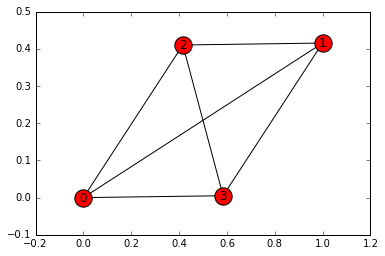

In [5]:
nx.draw_networkx(g)

In [24]:
g=nx.Graph()
for case in [tam+per for tam in ["ii","pi","fi"] for per in [num+nb for num in ["1","2","3"] for nb in "SP"]]:
    g.add_node(case)

In [25]:
syncretismes=[
    "ii1S = ii2S", 
    "ii3S = ii2S", 
    "ii3P = ii3S", 
    "ii1S = ii3S", 
    "ii3P = ii1S",
    "ii3P = ii2S",
    "fi3P = fi1P",
    "fi3P = fi2S",
    "fi3S = fi2S",
    "fi3S = fi1S",
    "ip3S = ip2S" 
            ]
syncretismes

['ii1S = ii2S',
 'ii3S = ii2S',
 'ii3P = ii3S',
 'ii1S = ii3S',
 'ii3P = ii1S',
 'ii3P = ii2S',
 'fi3P = fi1P',
 'fi3P = fi2S',
 'fi3S = fi2S',
 'fi3S = fi1S',
 'ip3S = ip2S']

In [26]:
for syncretisme in syncretismes:
    c1,c2=syncretisme.split(" = ")
    g.add_edge(c1,c2)
g.edges()

[('ii1S', 'ii3S'),
 ('ii1S', 'ii2S'),
 ('ii1S', 'ii3P'),
 ('ii3P', 'ii3S'),
 ('ii3P', 'ii2S'),
 ('ip3S', 'ip2S'),
 ('fi3S', 'fi2S'),
 ('fi3S', 'fi1S'),
 ('ii3S', 'ii2S'),
 ('fi3P', 'fi1P'),
 ('fi3P', 'fi2S')]

In [27]:
cliques=list(nx.find_cliques(g))

In [28]:
sCliques=sorted(cliques, key=len, reverse=True)
print len(sCliques),sCliques

15 [['ii1S', 'ii3S', 'ii3P', 'ii2S'], ['ip3S', 'ip2S'], ['fi3S', 'fi2S'], ['fi3S', 'fi1S'], ['fi3P', 'fi1P'], ['fi3P', 'fi2S'], ['ii1P'], ['pi3P'], ['ii2P'], ['pi1S'], ['pi1P'], ['pi3S'], ['pi2S'], ['fi2P'], ['pi2P']]


In [29]:
def findClique(cliques):
    pNodes=set()

    sCliques=sorted(cliques, key=len, reverse=True)

    cliqueFound=sCliques[0]
    pNodes=pNodes|set(sCliques[0])

    removeCliques=[]
    for clique in sCliques:
        sClique=set(clique)
#        print "sClique",sClique
        if set.intersection(pNodes,sClique):
#            print "intersection",set.intersection(pNodes,sClique)
            removeCliques.append(clique)
    for clique in removeCliques:
        sCliques.remove(clique)
#    print pCliques
#    print sCliques
    return (cliqueFound,sCliques)

In [30]:
foundCliques=[]
while sCliques:
    foundClique,sCliques=findClique(sCliques)
    foundCliques.append(foundClique)
#foundNodes=set()


In [31]:
foundCliques

[['ii1S', 'ii3S', 'ii3P', 'ii2S'],
 ['ip3S', 'ip2S'],
 ['fi3S', 'fi2S'],
 ['fi3P', 'fi1P'],
 ['ii1P'],
 ['pi3P'],
 ['ii2P'],
 ['pi1S'],
 ['pi1P'],
 ['pi3S'],
 ['pi2S'],
 ['fi2P'],
 ['pi2P']]

In [32]:
foundNodes=set(n for l in foundCliques for n in l )
print sorted(foundNodes)
missingNodes=[[n] for n in g.nodes() if not n in foundNodes]
missingNodes

['fi1P', 'fi2P', 'fi2S', 'fi3P', 'fi3S', 'ii1P', 'ii1S', 'ii2P', 'ii2S', 'ii3P', 'ii3S', 'ip2S', 'ip3S', 'pi1P', 'pi1S', 'pi2P', 'pi2S', 'pi3P', 'pi3S']


[['fi1S']]

In [33]:
partition=foundCliques+missingNodes
len(partition),partition

(14,
 [['ii1S', 'ii3S', 'ii3P', 'ii2S'],
  ['ip3S', 'ip2S'],
  ['fi3S', 'fi2S'],
  ['fi3P', 'fi1P'],
  ['ii1P'],
  ['pi3P'],
  ['ii2P'],
  ['pi1S'],
  ['pi1P'],
  ['pi3S'],
  ['pi2S'],
  ['fi2P'],
  ['pi2P'],
  ['fi1S']])

In [49]:
def findClique(cliques):
    pNodes=set()

    sCliques=sorted(cliques, key=len, reverse=True)

    cliqueFound=sorted(sCliques[0])
    pNodes=pNodes|set(sCliques[0])

    removeCliques=[]
    for clique in sCliques:
        sClique=set(clique)
#        print "sClique",sClique
        if set.intersection(pNodes,sClique):
#            print "intersection",set.intersection(pNodes,sClique)
            removeCliques.append(clique)
    for clique in removeCliques:
        sCliques.remove(clique)
#    print pCliques
#    print sCliques
    return (cliqueFound,sCliques)

In [50]:
def findPartition(syncretismes):
    g=nx.Graph()
    for syncretisme in syncretismes:
        c1,c2=syncretisme.split(" = ")
        g.add_edge(c1,c2)
    cliques=list(nx.find_cliques(g))
    sCliques=sorted(cliques, key=len, reverse=True)
    foundCliques=[]
    while sCliques:
        foundClique,sCliques=findClique(sCliques)
        foundCliques.append(foundClique)
    foundNodes=set(n for l in foundCliques for n in l )
    missingNodes=[[n] for n in g.nodes() if not n in foundNodes]
    partition=foundCliques+missingNodes
    dictPartition={l[0]:l for l in partition}
    return dictPartition

In [51]:
syncretismes=[
    "ii1S = ii2S", 
    "ii3S = ii2S", 
    "ii3P = ii3S", 
    "ii1S = ii3S", 
    "ii3P = ii1S",
    "ii3P = ii2S",
    "fi3P = fi1P",
    "fi3P = fi2S",
    "fi3S = fi2S",
    "fi3S = fi1S",
    "pi3S = pi2S" 
            ]

In [52]:
findPartition(syncretismes)

{'fi1P': ['fi1P', 'fi3P'],
 'fi1S': ['fi1S'],
 'fi2S': ['fi2S', 'fi3S'],
 'ii1S': ['ii1S', 'ii2S', 'ii3P', 'ii3S'],
 'pi2S': ['pi2S', 'pi3S']}